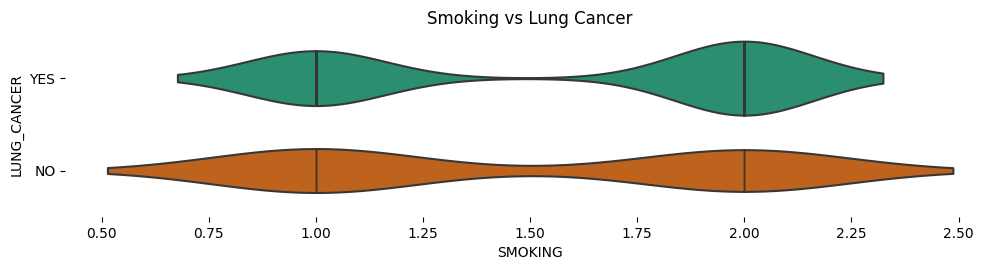

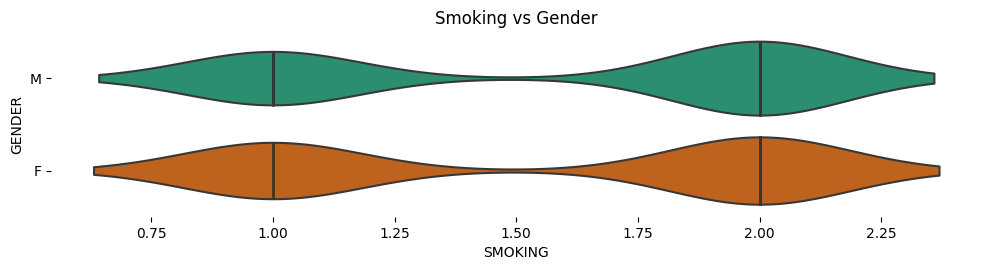

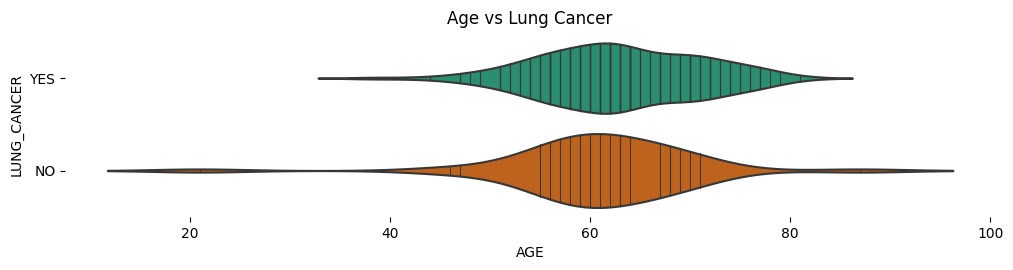

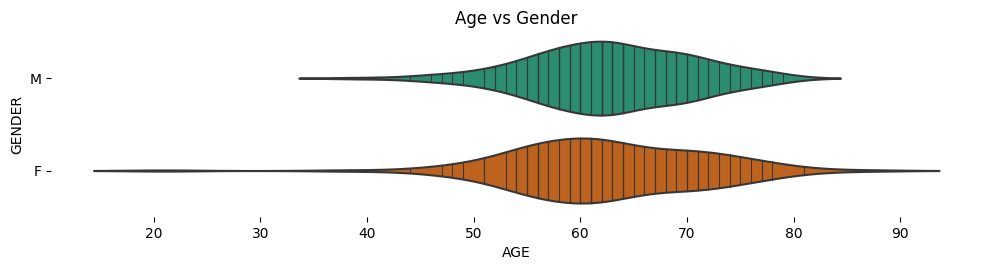

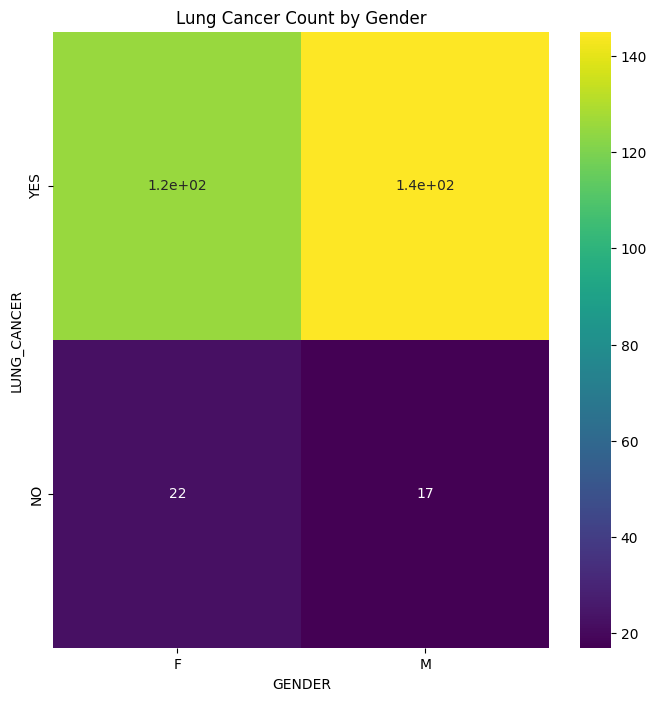

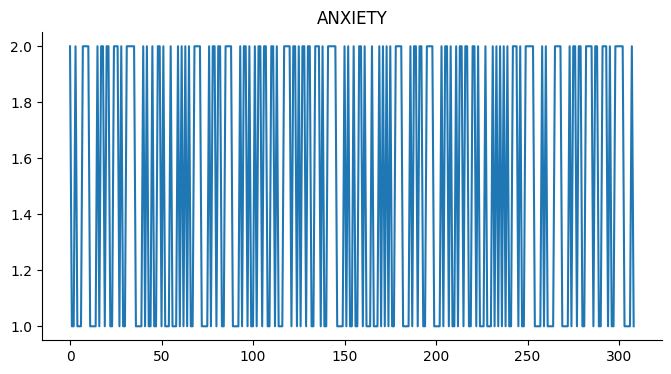

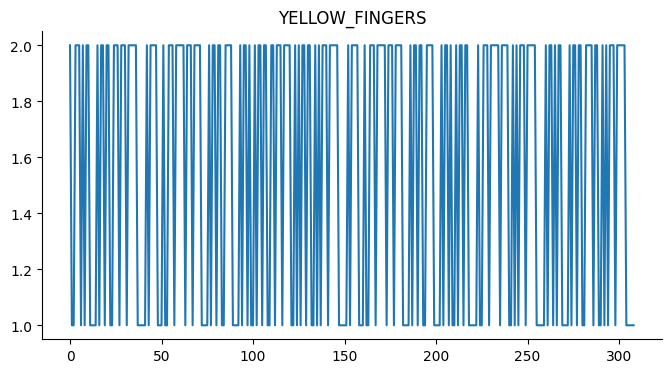

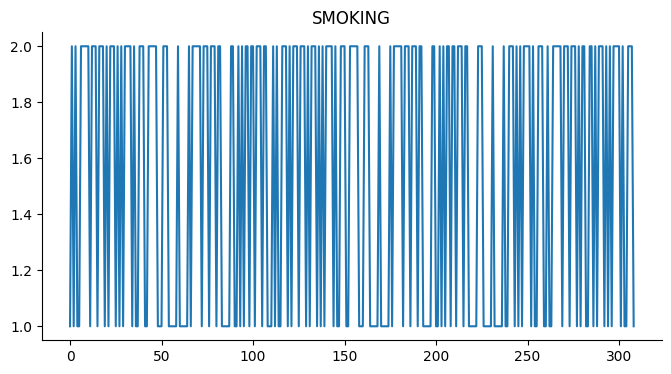

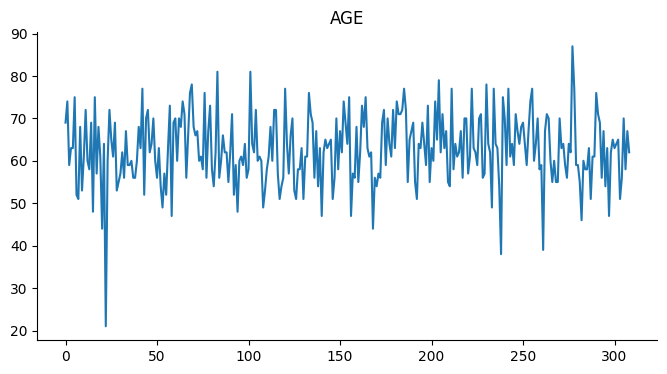

<Figure size 600x400 with 0 Axes>

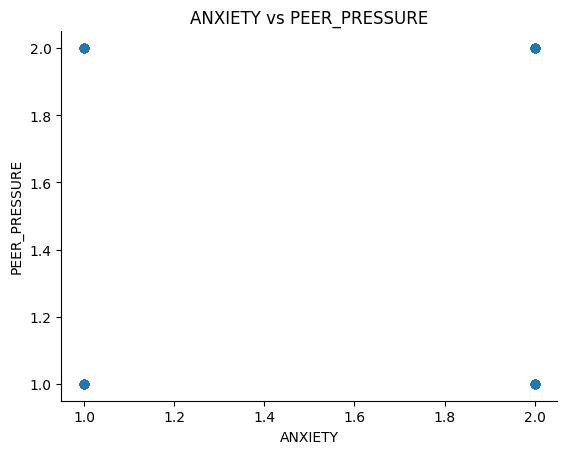

<Figure size 600x400 with 0 Axes>

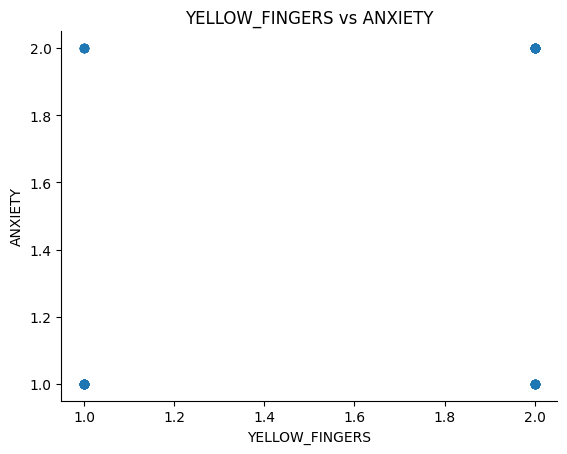

<Figure size 600x400 with 0 Axes>

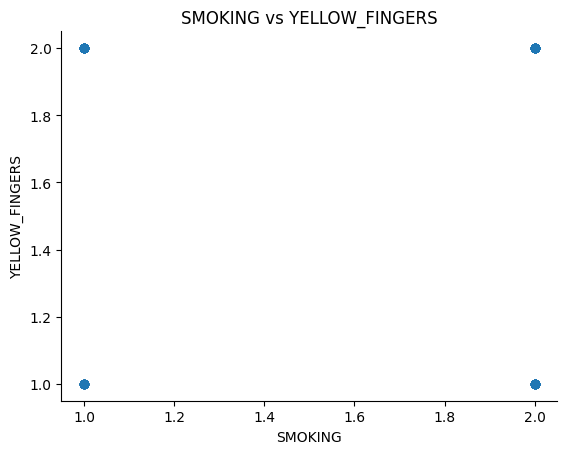

<Figure size 600x400 with 0 Axes>

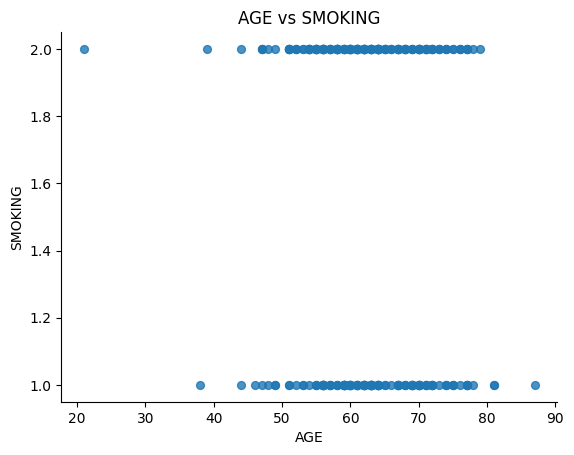

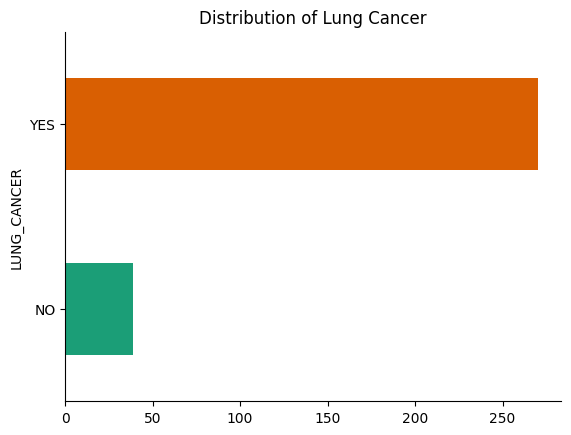

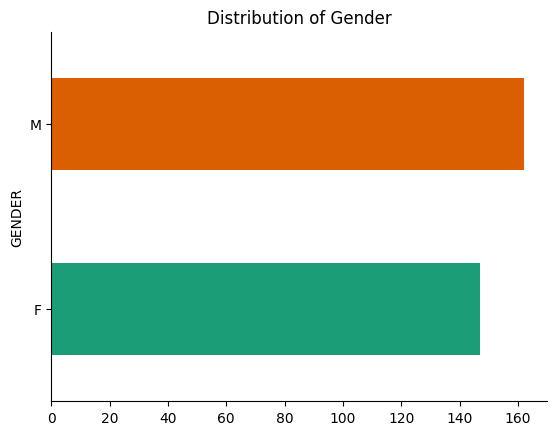

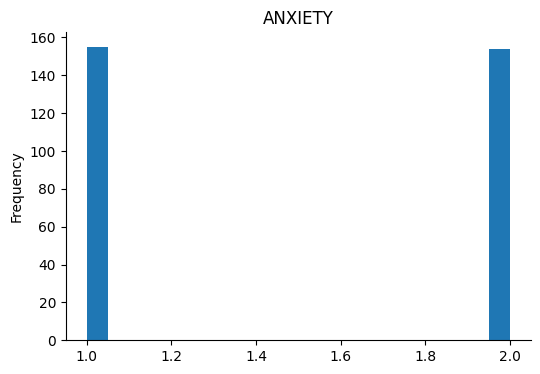

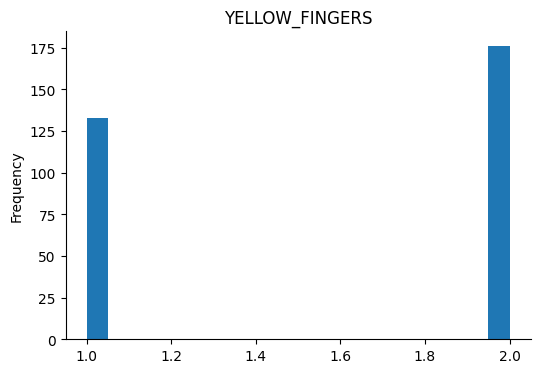

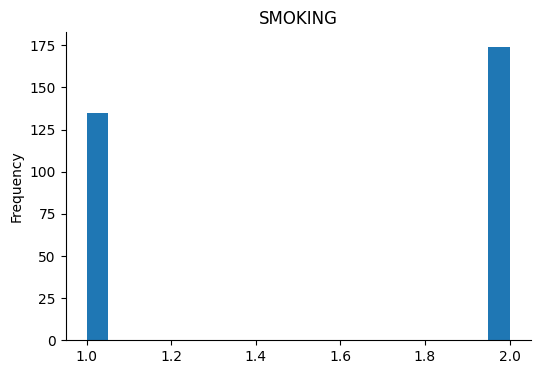

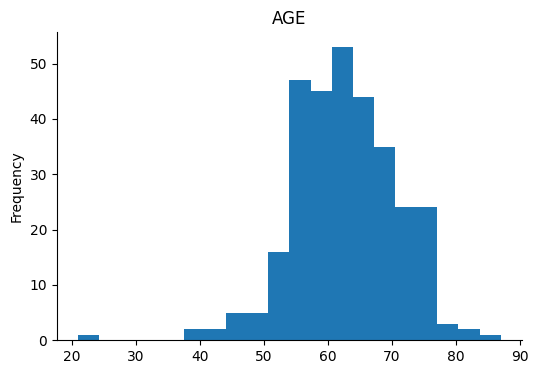

              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827    0.497588    0.497588           0.4

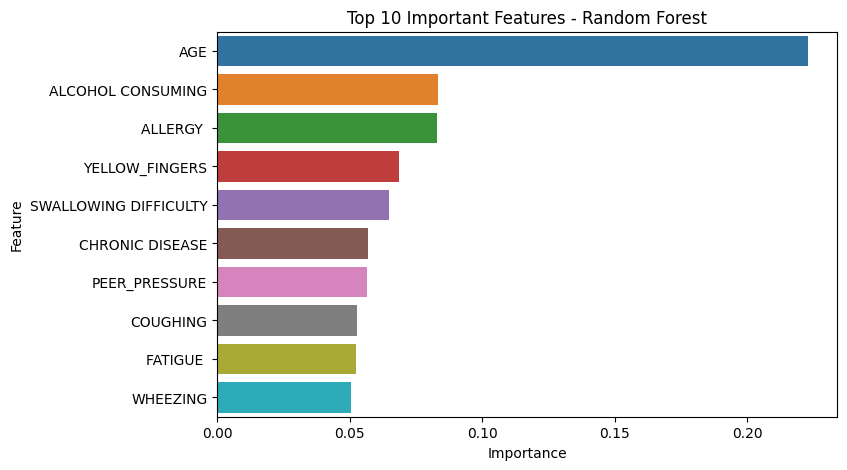


SVM Classifier Report
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        54
           1       0.91      0.91      0.91        54

    accuracy                           0.91       108
   macro avg       0.91      0.91      0.91       108
weighted avg       0.91      0.91      0.91       108

[[49  5]
 [ 5 49]]

Random Forest Classifier Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.96      0.89      0.92        54

    accuracy                           0.93       108
   macro avg       0.93      0.93      0.93       108
weighted avg       0.93      0.93      0.93       108

[[52  2]
 [ 6 48]]

Gradient Boosting Classifier Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.96      0.89      0.92        54

    accuracy                           0.93       1

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



MLP Classifier Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        54
           1       0.98      0.91      0.94        54

    accuracy                           0.94       108
   macro avg       0.95      0.94      0.94       108
weighted avg       0.95      0.94      0.94       108

[[53  1]
 [ 5 49]]
                 Model  Accuracy  Precision    Recall  F1 Score
5  Logistic Regression  0.972222   0.981132  0.962963  0.971963
3             AdaBoost  0.962963   0.980769  0.944444  0.962264
8                  LDA  0.953704   0.980392  0.925926  0.952381
4                  KNN  0.944444   0.961538  0.925926  0.943396
9                  MLP  0.944444   0.980000  0.907407  0.942308
7          Naive Bayes  0.935185   0.912281  0.962963  0.936937
6        Decision Tree  0.925926   0.942308  0.907407  0.924528
1        Random Forest  0.925926   0.960000  0.888889  0.923077
2    Gradient Boosting  0.925926   0.960000  0.888889  

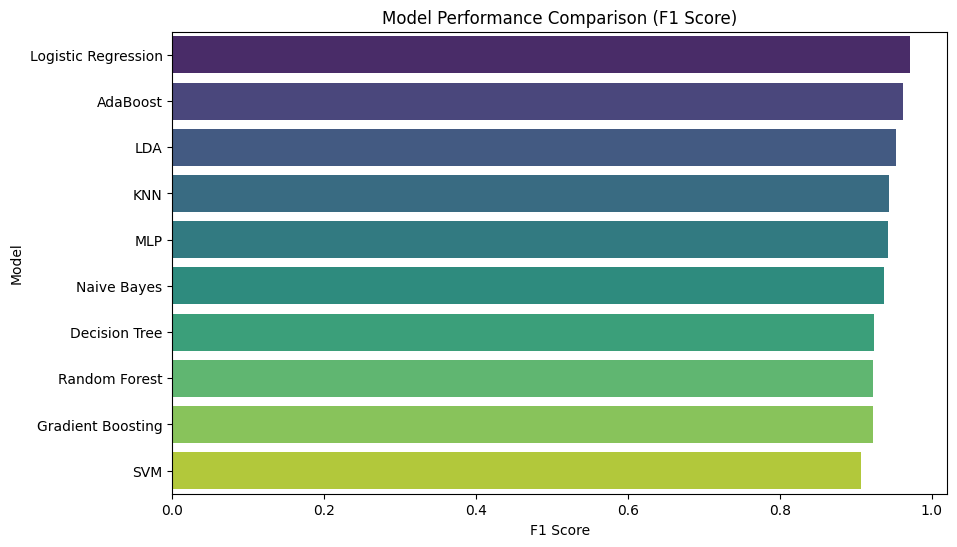

In [3]:
# Lung Cancer Prediction Project - Hamza Abuassi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Load data
data = pd.read_csv('/kaggle/input/lung-cancer/survey lung cancer.csv')

# Violin plots
figsize = (12, 1.2 * len(data['LUNG_CANCER'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data=data, x='SMOKING', y='LUNG_CANCER', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title("Smoking vs Lung Cancer")
plt.show()

figsize = (12, 1.2 * len(data['GENDER'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data=data, x='SMOKING', y='GENDER', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title("Smoking vs Gender")
plt.show()

figsize = (12, 1.2 * len(data['LUNG_CANCER'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data=data, x='AGE', y='LUNG_CANCER', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title("Age vs Lung Cancer")
plt.show()

figsize = (12, 1.2 * len(data['GENDER'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data=data, x='AGE', y='GENDER', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title("Age vs Gender")
plt.show()

# Heatmap for Lung Cancer counts by Gender
plt.figure(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['LUNG_CANCER'].value_counts()
    for x_label, grp in data.groupby('GENDER')
})
sns.heatmap(df_2dhist, cmap='viridis', annot=True)
plt.xlabel('GENDER')
plt.ylabel('LUNG_CANCER')
plt.title("Lung Cancer Count by Gender")
plt.show()

# Line plots
for col in ['ANXIETY', 'YELLOW_FINGERS', 'SMOKING', 'AGE']:
    plt.figure(figsize=(8, 4))
    data[col].plot(kind='line', title=col)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

# Scatter plots
scatter_pairs = [
    ('ANXIETY', 'PEER_PRESSURE'),
    ('YELLOW_FINGERS', 'ANXIETY'),
    ('SMOKING', 'YELLOW_FINGERS'),
    ('AGE', 'SMOKING')
]

for x, y_ in scatter_pairs:
    plt.figure(figsize=(6, 4))
    data.plot(kind='scatter', x=x, y=y_, s=32, alpha=.8)
    plt.title(f"{x} vs {y_}")
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

# Bar plots
plt.figure()
data.groupby('LUNG_CANCER').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.title("Distribution of Lung Cancer")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

plt.figure()
data.groupby('GENDER').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.title("Distribution of Gender")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# Histograms
for col in ['ANXIETY', 'YELLOW_FINGERS', 'SMOKING', 'AGE']:
    plt.figure(figsize=(6,4))
    data[col].plot(kind='hist', bins=20, title=col)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

# Summary statistics
print(data.describe())
print(data.isnull().sum())

# Preprocessing
y = data['LUNG_CANCER']
df = data.drop(['LUNG_CANCER'], axis=1)
df = pd.get_dummies(df)
df['GENDER_F'] = df['GENDER_F'].astype(int)
df['GENDER_M'] = df['GENDER_M'].astype(int)

# Feature importance
rf = RandomForestClassifier(n_estimators=100)
rf.fit(df, y)
importance_df = pd.DataFrame({
    'Feature': df.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Important Features - Random Forest')
plt.show()

# Balancing and Scaling
df, y = SMOTE(random_state=42).fit_resample(df, y)
y = LabelEncoder().fit_transform(y)
df = StandardScaler().fit_transform(df)

# Split data
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42, stratify=y)

# Classifiers
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "MLP": MLPClassifier()
}

results = []
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })
    print(f"\n{name} Classifier Report")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# Model comparison
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(results_df)

plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x='F1 Score', y='Model', palette='viridis')
plt.title("Model Performance Comparison (F1 Score)")
plt.show()
